# Video Game Sales EDA - EWD Project
> William Baaklini s34859

Creds:
- [Video Game Sales 2024](https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024)
- [Data Cleaning](https://www.kaggle.com/code/dmitriibondarenko/data-cleaning)

In this project, we explore a dataset of video game sales to identify trends and develop predictive models for game success. We aim to answer the following questions:

- What factors (genre, platform, publisher, etc.) influence game sales?
- Can we predict whether a game will be a high-seller?
- Are there patterns or clusters among video games based on regional sales?

We will go through:
- Data cleaning and preprocessing
- Exploratory data analysis (EDA)
- Predictive modeling (regression & classification)
- Optional: Clustering and segmentation

## 1. Data exploration and preprocessing

### Data Exploring and Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests, io
from IPython.display import Image, display, HTML

# Load your CSV file
df = pd.read_csv("vgchartz-2024.csv")

# Show the number of entries (rows)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [31]:
df.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

created a cleaned version of the dataset by removing irrelevant columns, dropping rows missing critical fields, filling missing sales and critic scores with column medians, and ensuring valid release dates. Categorical fields like publisher and developer were filled with "Unknown" for consistency.

In [ ]:
clean_df = df.copy()

clean_df = clean_df.drop(columns=['last_update', 'img'])
clean_df = clean_df.dropna(subset=['title', 'total_sales'])

sales_cols = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
for col in sales_cols:
    mean_val = clean_df[col].mean()
    clean_df[col] = clean_df[col].fillna(mean_val)

clean_df['developer'] = clean_df['developer'].fillna('Unknown')
clean_df['publisher'] = clean_df['publisher'].fillna('Unknown')

clean_df['release_date'] = pd.to_datetime(clean_df['release_date'], errors='coerce')
release_median = clean_df['release_date'].median()
clean_df = clean_df.dropna(subset=['release_date'])

clean_df['critic_score_missing'] = clean_df['critic_score'].isnull().astype(int)
clean_df['critic_score'] = clean_df['critic_score'].fillna(clean_df['critic_score'].median())

print(f"Number of rows before cleaning: {len(df)}")
print(f"Number of rows after cleaning: {len(clean_df)}")

Number of rows before cleaning: 64016
Number of rows after cleaning: 18832


In [54]:
clean_df.isnull().sum()

title                   0
console                 0
genre                   0
publisher               0
developer               0
critic_score            0
total_sales             0
na_sales                0
jp_sales                0
pal_sales               0
other_sales             0
release_date            0
critic_score_missing    0
dtype: int64

### Highest-selling game

This visual showcases the highest-selling game, offering a quick glance at its key details like platform, genre, publisher, and critic score to understand what drives massive success.

In [26]:
top_game = df.sort_values("total_sales", ascending=False).iloc[0]

base_url = "https://www.vgchartz.com/"
img_url = base_url + top_game["img"]

stats_html = f"""
<div style='display: flex; align-items: flex-start; gap: 20px;'>
  <img src='{img_url}' width='200' style='flex-shrink: 0;'/>
  <div>
    <h3 style='margin-top: 0;'>{top_game['title']}</h3>
    <ul style='margin: 0; padding-left: 20px;'>
      <li><b>Platform:</b> {top_game['console']}</li>
      <li><b>Publisher:</b> {top_game['publisher']}</li>
      <li><b>Genre:</b> {top_game['genre']}</li>
      <li><b>Global Sales:</b> {top_game['total_sales']:.2f} M units</li>
      <li><b>Critic Score:</b> {top_game['critic_score']}</li>
    </ul>
  </div>
</div>
"""

display(HTML(stats_html))

### Top 10 Selling Games

This bar chart highlights the best-performing games globally, allowing us to identify standout titles and potential commonalities among top sellers.

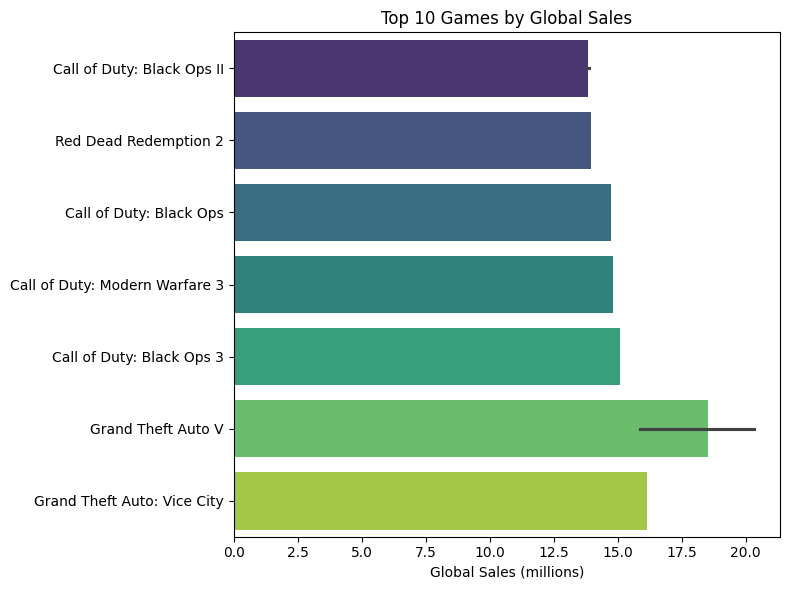

In [10]:
top_10_games = (
    df.sort_values("total_sales", ascending=False)
      .head(10)
      .sort_values("total_sales")  # reverse for horizontal bar
)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_10_games,
    x="total_sales",
    y="title",
    hue="title",
    palette="viridis",
    legend=False
)
plt.title("Top 10 Games by Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("")
plt.tight_layout()
plt.show()

### Sales by Genre

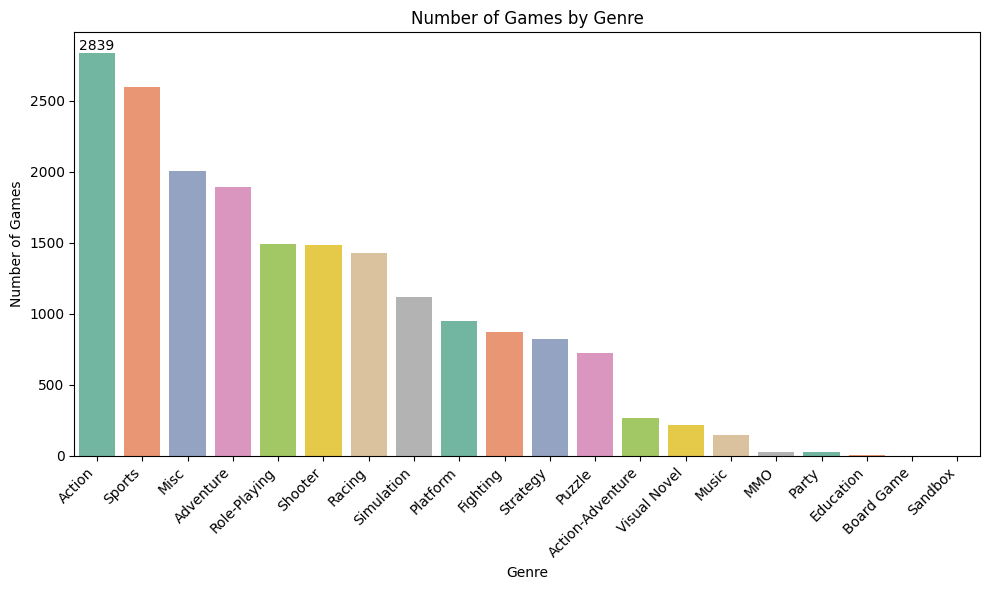

In [30]:
# Count of games per genre
games_to_genre = (
    pd.DataFrame(df.groupby('genre')['total_sales'].count())
    .sort_values('total_sales', ascending=False)
    .rename(columns={'total_sales': 'game_count'})
)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=games_to_genre,
    x='genre',
    y='game_count',
    hue='genre',
    palette='Set2',
    legend=False
)

# Rotate x-tick labels safely
plt.xticks(rotation=45, ha='right')

ax.set_title('Number of Games by Genre')
ax.set_ylabel('Number of Games')
ax.set_xlabel('Genre')
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.5g')

plt.tight_layout()
plt.show()

### Standardized Sales Trends Over Time

This time-series plot shows how global game sales have evolved over the years, standardized to highlight relative changes and detect key peaks and dip

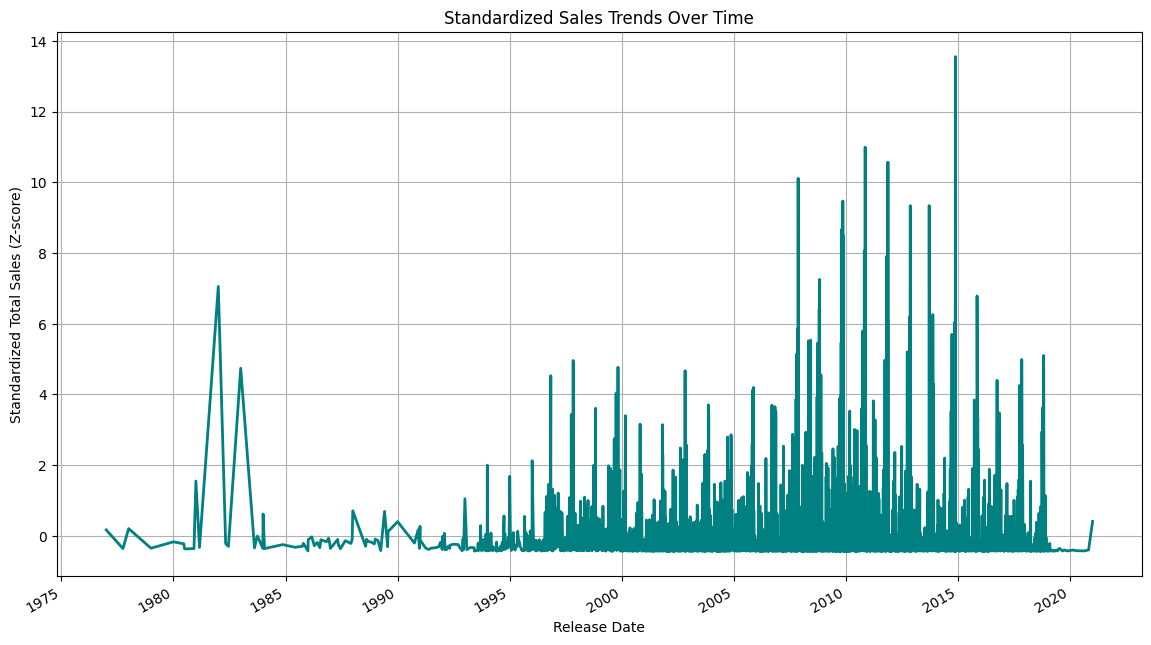

In [19]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df_filtered_time = df[df['release_date'].notnull() & df['total_sales'].notnull()]
sales_trends = df_filtered_time.groupby('release_date')['total_sales'].sum()

# Standardize using z-score
standardized_sales = (sales_trends - sales_trends.mean()) / sales_trends.std()

plt.figure(figsize=(14, 8))
standardized_sales.plot(linewidth=2, color='teal')
plt.title('Standardized Sales Trends Over Time')
plt.xlabel('Release Date')
plt.ylabel('Standardized Total Sales (Z-score)')
plt.grid(True)
plt.show()

### Total Sales Comparison Across Regions
This bar chart compares total game sales by region, revealing regional market strengths and helping identify where games perform best globally.

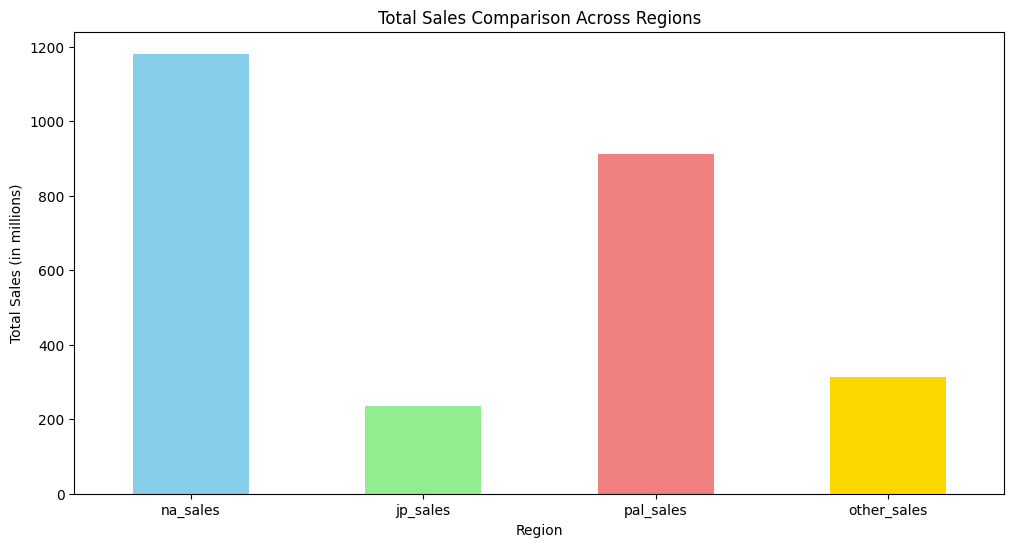

In [16]:
df_filtered_regions = df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].dropna()
total_sales_by_region = df_filtered_regions.sum()
plt.figure(figsize=(12, 6))
total_sales_by_region.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Total Sales Comparison Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0)
plt.show()

### Distribution of Critic Scores

This histogram shows the spread of critic scores, providing insight into how games are generally reviewed and the common rating ranges.

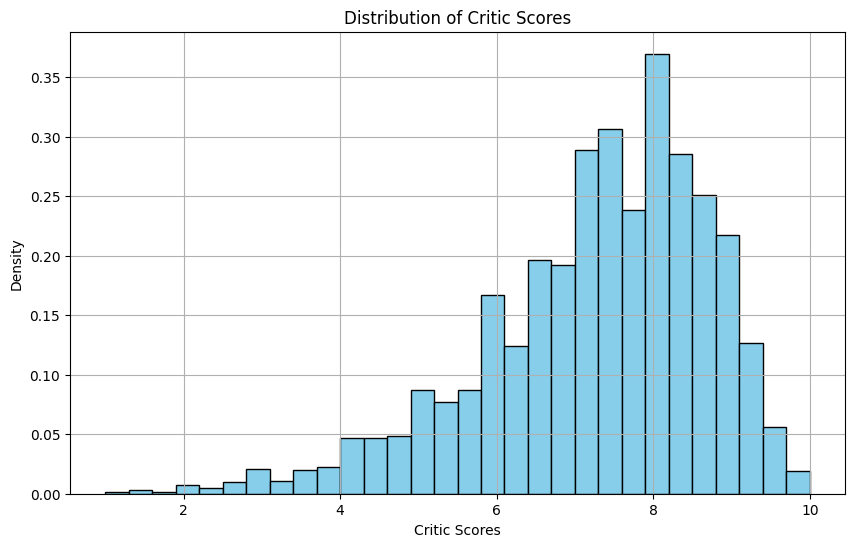

In [17]:
df_filtered_scores = df['critic_score'].dropna()
plt.figure(figsize=(10, 6))
plt.hist(df_filtered_scores, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Scores')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Critic Score and Total Sales

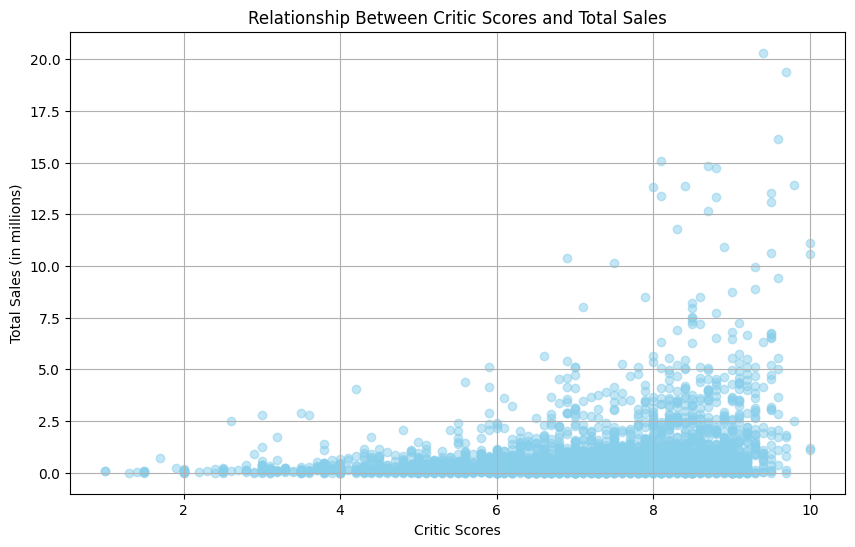

In [18]:
df_filtered_relationship = df[['critic_score', 'total_sales']].dropna()
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_relationship['critic_score'], df_filtered_relationship['total_sales'], color='skyblue', alpha=0.5)
plt.title('Relationship Between Critic Scores and Total Sales')
plt.xlabel('Critic Scores')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

### Correlation: Critic Score and Sales

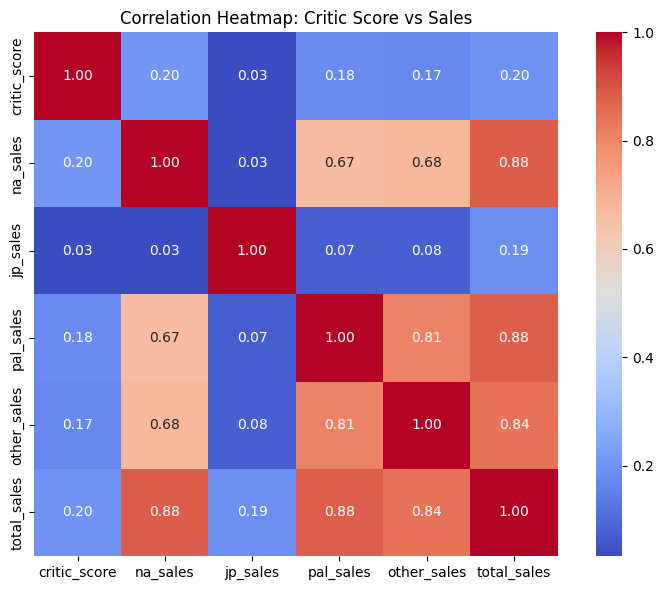

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns and drop rows with missing values
corr_data = clean_df[['critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'total_sales']].dropna()

# Compute correlation matrix
correlation_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap: Critic Score vs Sales')
plt.tight_layout()
plt.show()

## Modeling

### Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, max_error

# Prepare dataset
df_model = clean_df.copy()
df_model["release_year"] = df_model["release_date"].dt.year

# Features and target
X = df_model[[
    "console", "genre", "developer", "publisher",
    "critic_score", "release_year"
]]
y = df_model["total_sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

cat_features = ["console", "genre", "developer", "publisher"]
num_features = ["critic_score", "release_year"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
], remainder="passthrough")

# Models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    max_err = max_error(y_test, y_pred)

    print(f"\n{name}:")
    print("  RMSE:", round(rmse, 3))
    print("  MAE :", round(mae, 3))
    print("  Max Error:", round(max_err, 3))
    print("  R² Score:", round(r2, 3))


Linear Regression:
  RMSE: 0.694
  MAE : 0.343
  Max Error: 14.884
  R² Score: 0.289

Ridge Regression:
  RMSE: 0.675
  MAE : 0.329
  Max Error: 15.116
  R² Score: 0.328

Lasso Regression:
  RMSE: 0.822
  MAE : 0.375
  Max Error: 19.968
  R² Score: 0.003

K-Nearest Neighbors:
  RMSE: 0.668
  MAE : 0.292
  Max Error: 14.834
  R² Score: 0.342

Random Forest:
  RMSE: 0.665
  MAE : 0.245
  Max Error: 15.783
  R² Score: 0.347

Gradient Boosting:
  RMSE: 0.641
  MAE : 0.289
  Max Error: 15.245
  R² Score: 0.394


**Why Gradient Boosting Regressor Wins:**

Lowest RMSE → best overall prediction quality

Highest R² → explains more variance than any other model

Low MAE → strong average prediction accuracy

Acceptable Max Error → slightly higher than others, but not critical

**Let's Tune it further:**

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the pipeline again
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

# Grid of hyperparameters
param_grid = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1, 0.2],
    "model__max_depth": [3, 5, 7],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 3]
}

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)

# Best params and score
print("Best Parameters:")
print(grid_search.best_params_)
print(f"Best RMSE: {-grid_search.best_score_:.3f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters:
{'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best RMSE: 0.615


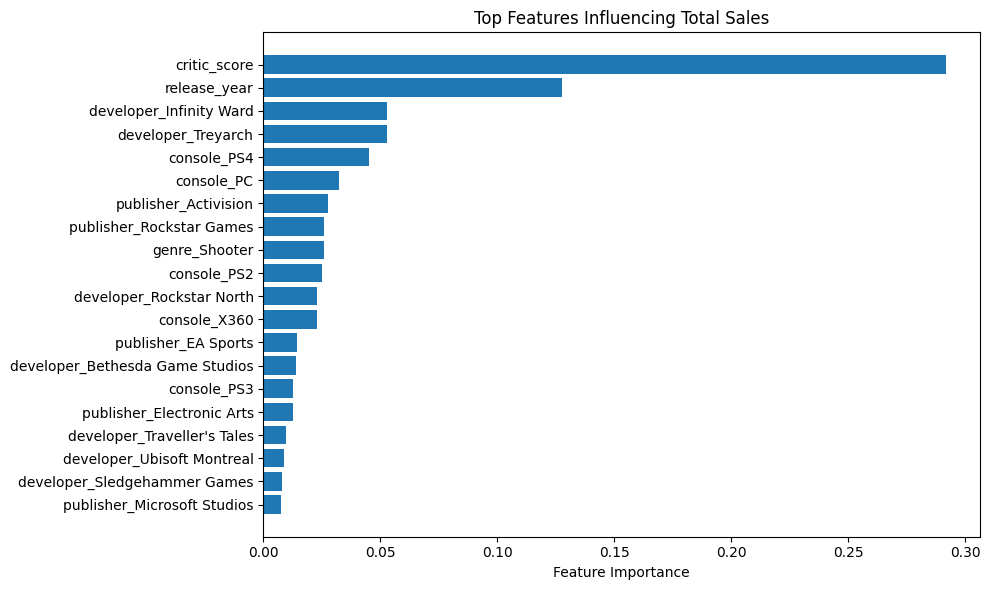

In [63]:
import matplotlib.pyplot as plt
import numpy as np

num_features = ["critic_score", "release_year"]

# Refit best model on all training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Get feature names from encoder
ohe = best_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_features)
all_feature_names = np.concatenate([cat_feature_names, num_features])

# Get importances
importances = best_model.named_steps["model"].feature_importances_
indices = np.argsort(importances)[-20:]  # top 20

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [all_feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top Features Influencing Total Sales")
plt.tight_layout()
plt.show()

### Classification

We’re using pd.qcut() to divide total_sales into 4 quantile-based classes (0–3), representing low to high selling games. This transforms our regression target into a multi-class classification task.

In [75]:
df_model = clean_df.copy()
df_model["release_year"] = df_model["release_date"].dt.year
df_model = df_model.dropna(subset=[
    "console", "genre", "developer", "publisher",
    "critic_score", "release_year", "total_sales"
])
df_model["sales_class"] = pd.qcut(df_model["total_sales"], q=4, labels=False)

sales_class_labels = {
    0: "Very Low Sales",
    1: "Low Sales",
    2: "Moderate Sales",
    3: "High Sales"
}

df_model["sales_class_label"] = df_model["sales_class"].map(sales_class_labels)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize, StandardScaler

# Features and target
X = df_model[[
    "console", "genre", "developer", "publisher",
    "critic_score", "release_year"
]]
y = df_model["sales_class"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing
cat_features = ["console", "genre", "developer", "publisher"]
num_features = ["critic_score", "release_year"]

# Preprocessor with scaling for numeric features
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ("num", StandardScaler(), num_features)
])

# Classifiers to compare
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver='lbfgs'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Evaluate each
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", clf)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    print(f"\n{name}:")
    print("  Accuracy        :", round(accuracy_score(y_test, y_pred), 3))
    print("  F1 Score (macro):", round(f1_score(y_test, y_pred, average="macro"), 3))

    # Check if y_prob is a valid 2D array
    if y_prob is not None and len(np.unique(y)) > 2 and y_prob.ndim == 2:
        y_test_binarized = label_binarize(y_test, classes=np.unique(y))
        print("  ROC AUC (macro) :", round(roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class='ovr'), 3)) 


Logistic Regression:
  Accuracy        : 0.507
  F1 Score (macro): 0.501

K-Nearest Neighbors:
  Accuracy        : 0.487
  F1 Score (macro): 0.483

Random Forest:
  Accuracy        : 0.511
  F1 Score (macro): 0.508

Gradient Boosting:
  Accuracy        : 0.482
  F1 Score (macro): 0.485


Best Model:
**Random Forest Classifier**

Highest accuracy (0.511)

Highest macro F1 score (0.508) — important since this is a multi-class task

More robust to class imbalance and complex relationships than logistic regression

**Let's Fine Tune IT!**

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Pipeline
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

# Grid to search
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 3]
}

# Grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", round(grid_search.best_score_, 3))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best Cross-Validated Accuracy: 0.524


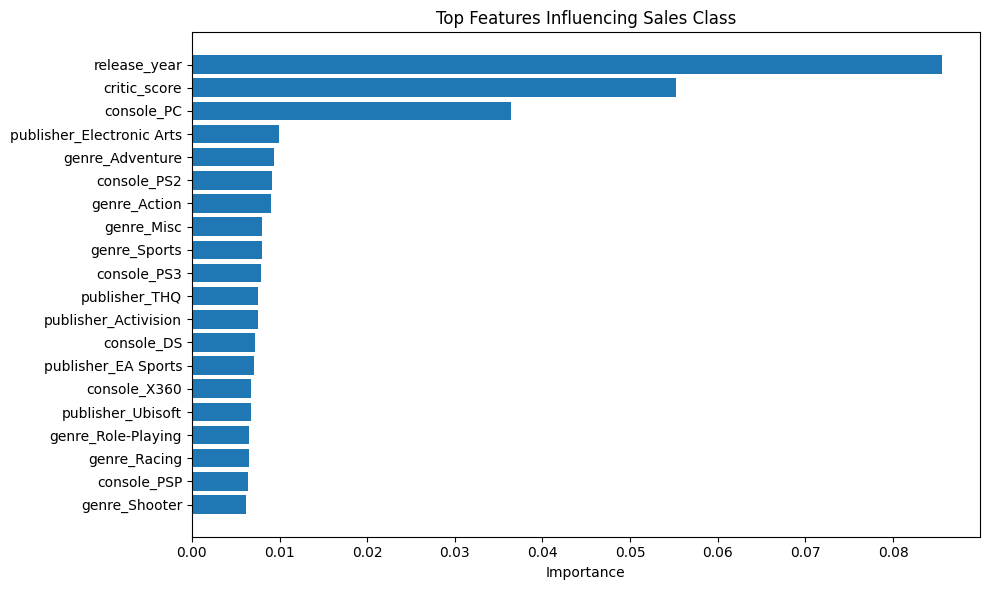

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Refit best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Get feature names
ohe = best_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_features)
all_feature_names = np.concatenate([cat_feature_names, num_features])

# Importance
importances = best_model.named_steps["model"].feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [all_feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.title("Top Features Influencing Sales Class")
plt.tight_layout()
plt.show()

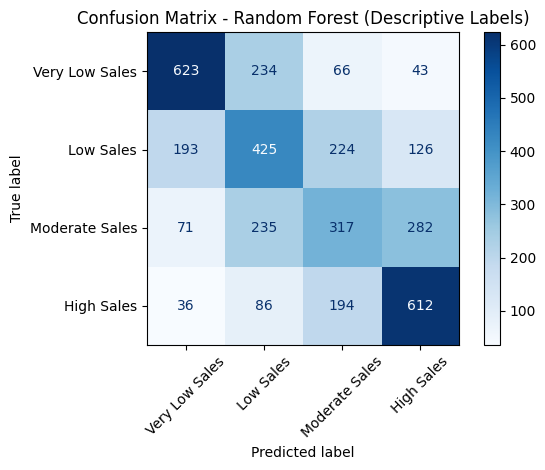

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Unique label list for consistent order
label_names = list(sales_class_labels.values())

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest (Descriptive Labels)")
plt.tight_layout()
plt.show()

### Clustering

**Regional Sales Clustering**

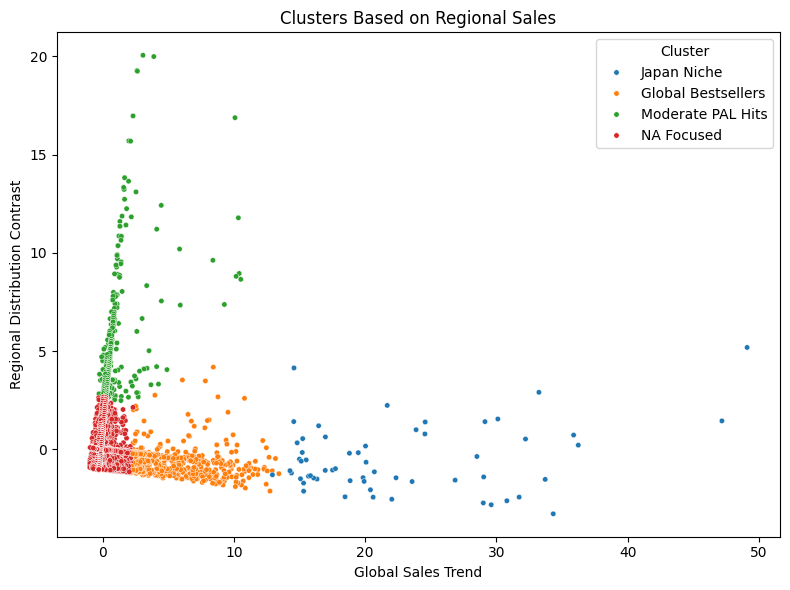

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select regional sales features and drop missing values
sales_features = ["na_sales", "jp_sales", "pal_sales", "other_sales", "total_sales"]
cluster_data_sales = clean_df[sales_features].dropna()

# Scale the data
scaler = StandardScaler()
X_sales = scaler.fit_transform(cluster_data_sales)

# Fit KMeans
kmeans_sales = KMeans(n_clusters=4, random_state=42)
cluster_data_sales["cluster"] = kmeans_sales.fit_predict(X_sales)

# Assign descriptive labels
cluster_labels_sales = {
    0: "NA Focused",
    1: "Global Bestsellers",
    2: "Japan Niche",
    3: "Moderate PAL Hits"
}
cluster_data_sales["cluster_label"] = cluster_data_sales["cluster"].map(cluster_labels_sales)

# PCA for 2D visualization
pca_sales = PCA(n_components=2)
X_sales_pca = pca_sales.fit_transform(X_sales)

# Plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_sales_pca[:, 0],
    y=X_sales_pca[:, 1],
    hue=cluster_data_sales["cluster_label"],
    palette=sns.color_palette("tab10", n_colors=4),
    s=15
)
plt.title("Clusters Based on Regional Sales")
plt.xlabel("Global Sales Trend")
plt.ylabel("Regional Distribution Contrast")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

**Features Clustering**

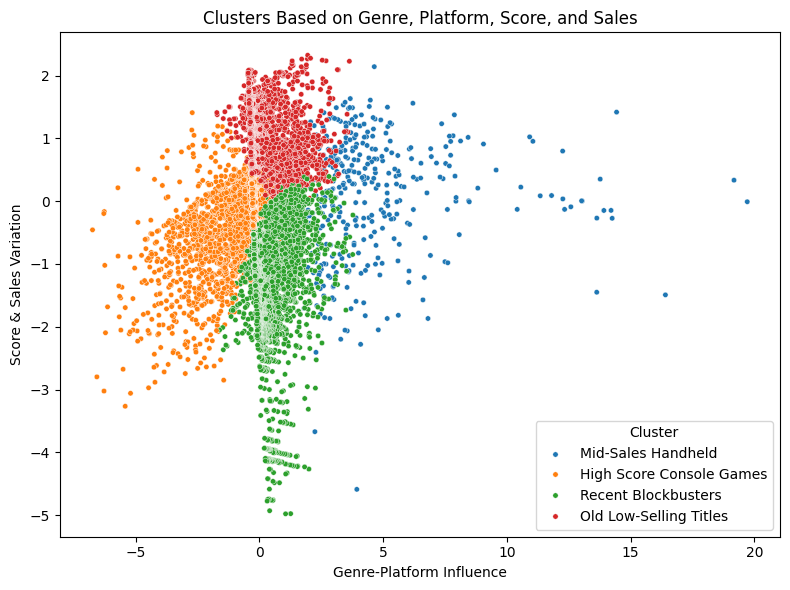

In [81]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Prepare features
df_features = clean_df.copy()
df_features["release_year"] = df_features["release_date"].dt.year

# Drop rows with missing required data
df_features = df_features.dropna(subset=[
    "genre", "console", "critic_score", "release_year", "total_sales"
])

# Select features
X_features = df_features[[
    "genre", "console", "critic_score", "release_year", "total_sales"
]]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), ["genre", "console"]),
    ("num", StandardScaler(), ["critic_score", "release_year", "total_sales"])
])

# Transform data
X_transformed = preprocessor.fit_transform(X_features)

# Apply KMeans
kmeans_features = KMeans(n_clusters=4, random_state=42)
df_features["cluster"] = kmeans_features.fit_predict(X_transformed)

# Assign descriptive cluster names (adjust these based on cluster analysis)
cluster_labels_features = {
    0: "High Score Console Games",
    1: "Old Low-Selling Titles",
    2: "Mid-Sales Handheld",
    3: "Recent Blockbusters"
}
df_features["cluster_label"] = df_features["cluster"].map(cluster_labels_features)

# PCA for 2D projection
X_features_pca = PCA(n_components=2).fit_transform(X_transformed.toarray())

# Plot clusters with readable labels
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_features_pca[:, 0],
    y=X_features_pca[:, 1],
    hue=df_features["cluster_label"],
    palette=sns.color_palette("tab10", n_colors=4),
    s=15
)
plt.title("Clusters Based on Genre, Platform, Score, and Sales")
plt.xlabel("Genre-Platform Influence")
plt.ylabel("Score & Sales Variation")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
